In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv('laptop_details.csv')

In [3]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [5]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [6]:
df.duplicated().sum()

297

In [7]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [8]:
df.shape

(720, 4)

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(423, 4)

In [11]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [12]:
def extract_features(row):
    product = row['Product']
    feature = row['Feature']
    
    RAM = re.findall(r'(\d+) ?(?:GB|TB)', feature)
    RAM = RAM[0] + ' GB' if RAM else None
    
    ram_type = re.findall(r'(?:LP)?DDR\d\S*|Unified\sMemory', feature)
    ram_type = ram_type[0] if ram_type else None
    
    processor = re.findall(r'(?:AMD|Intel|M1|Qualcomm|Apple)[\s\w]+Processor', feature)
    processor = processor[0] if processor else None

    storage = re.findall(r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD|EMMC)', product)
    storage = storage[0] if storage else None
    
    os = re.findall(r'(Windows (?:10|11)|Mac OS|Linux|DOS|Chrome)[\s\w]*Operating System', feature)
    os = os[0] if os else None

    display = re.findall(r'\d+(?:\.\d+)?\s*(?:cm|inch)\s*(?:\(|:)?\s*\d+(?:\.\d+)?\s*(?:cm|inch)?', feature)
    display = display[0] if display else None
    
    brand = re.findall(r'^\w+', product)
    brand = brand[0] if brand else None
    
    return pd.Series([RAM, ram_type, processor, storage, os, display, brand], 
                     index=['Ram_Size', 'Ram_Type', 'Processor', 'Storage', 'OS', 'Display', 'Brand'])

df[['Ram_Size', 'Ram_Type', 'Processor', 'Storage', 'OS', 'Display', 'Brand']] = df.apply(extract_features, axis=1)

In [13]:
df

,Product,Rating,MRP,Feature,Ram_Size,Ram_Type,Processor,Storage,OS,Display,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,8 GB,DDR4,Intel Core i3 Processor,256 GB SSD,Windows 11,35.56 cm (14 inch,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,8 GB,DDR4,Intel Core i3 Processor,512 GB SSD,Windows 11,39.62 cm (15.6 inch,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,8 GB,DDR4,Intel Core i3 Processor,512 GB SSD,Windows 11,39.62 cm (15.6 inch,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,8 GB,DDR4,AMD Ryzen 5 Hexa Core Processor,512 GB SSD,Windows 10,39.62 cm (15.6 inch,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,8 GB,DDR4,Intel Core i5 Processor,512 GB SSD,Windows 11,39.62 cm (15.6 inch,ASUS
...,...,...,...,...,...,...,...,...,...,...,...
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,NaN,"₹76,590",Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,16 GB,DDR5,Intel Core i5 Processor,512 GB SSD,Windows 11,33.78 cm (13.3,DELL
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,4.6,"₹90,000",AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,16 GB,DDR4,AMD Ryzen 7 Octa Core Processor,512 GB SSD,Windows 10,39.62 cm (15.6 inch,HP
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,4 GB,LPDDR4,Intel Celeron Dual Core Processor,64 GB EMMC,Chrome,29.46 cm (11.6 inch,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,16 GB,LPDDR5,Intel Core i7 Processor,512 GB SSD,Windows 11,35.56 cm (14 inch,ASUS


In [14]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature', 'Ram_Size', 'Ram_Type',
       'Processor', 'Storage', 'OS', 'Display', 'Brand'],
      dtype='object')

In [15]:
df = df.drop(columns=['Product','Rating','Feature'])

In [16]:
df.shape

(423, 8)

In [17]:
df.head()

,MRP,Ram_Size,Ram_Type,Processor,Storage,OS,Display,Brand
0,"₹36,990",8 GB,DDR4,Intel Core i3 Processor,256 GB SSD,Windows 11,35.56 cm (14 inch,Lenovo
1,"₹39,990",8 GB,DDR4,Intel Core i3 Processor,512 GB SSD,Windows 11,39.62 cm (15.6 inch,Lenovo
2,"₹32,990",8 GB,DDR4,Intel Core i3 Processor,512 GB SSD,Windows 11,39.62 cm (15.6 inch,ASUS
3,"₹49,990",8 GB,DDR4,AMD Ryzen 5 Hexa Core Processor,512 GB SSD,Windows 10,39.62 cm (15.6 inch,HP
4,"₹49,990",8 GB,DDR4,Intel Core i5 Processor,512 GB SSD,Windows 11,39.62 cm (15.6 inch,ASUS


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 719
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MRP        423 non-null    object
 1   Ram_Size   423 non-null    object
 2   Ram_Type   423 non-null    object
 3   Processor  423 non-null    object
 4   Storage    423 non-null    object
 5   OS         423 non-null    object
 6   Display    423 non-null    object
 7   Brand      423 non-null    object
dtypes: object(8)
memory usage: 29.7+ KB


In [19]:
df.isnull().sum()

MRP          0
Ram_Size     0
Ram_Type     0
Processor    0
Storage      0
OS           0
Display      0
Brand        0
dtype: int64

In [20]:
df.duplicated().sum()

14

In [21]:
df = df.drop_duplicates()

In [22]:
df["Ram_Size"]=df["Ram_Size"].str.replace("GB","")
df["Ram_Size"]=df["Ram_Size"].str.replace("TB","000")

In [23]:
df["Ram_Size"]=df["Ram_Size"].astype("int")

In [24]:
df['MRP'] = df['MRP'].str.replace('₹', '')
df['MRP'] = df['MRP'].str.replace(',', '')

df.head()

,MRP,Ram_Size,Ram_Type,Processor,Storage,OS,Display,Brand
0,36990,8,DDR4,Intel Core i3 Processor,256 GB SSD,Windows 11,35.56 cm (14 inch,Lenovo
1,39990,8,DDR4,Intel Core i3 Processor,512 GB SSD,Windows 11,39.62 cm (15.6 inch,Lenovo
2,32990,8,DDR4,Intel Core i3 Processor,512 GB SSD,Windows 11,39.62 cm (15.6 inch,ASUS
3,49990,8,DDR4,AMD Ryzen 5 Hexa Core Processor,512 GB SSD,Windows 10,39.62 cm (15.6 inch,HP
4,49990,8,DDR4,Intel Core i5 Processor,512 GB SSD,Windows 11,39.62 cm (15.6 inch,ASUS


In [25]:
df['MRP'] = df['MRP'].astype('float')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 719
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MRP        409 non-null    float64
 1   Ram_Size   409 non-null    int32  
 2   Ram_Type   409 non-null    object 
 3   Processor  409 non-null    object 
 4   Storage    409 non-null    object 
 5   OS         409 non-null    object 
 6   Display    409 non-null    object 
 7   Brand      409 non-null    object 
dtypes: float64(1), int32(1), object(6)
memory usage: 27.2+ KB


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

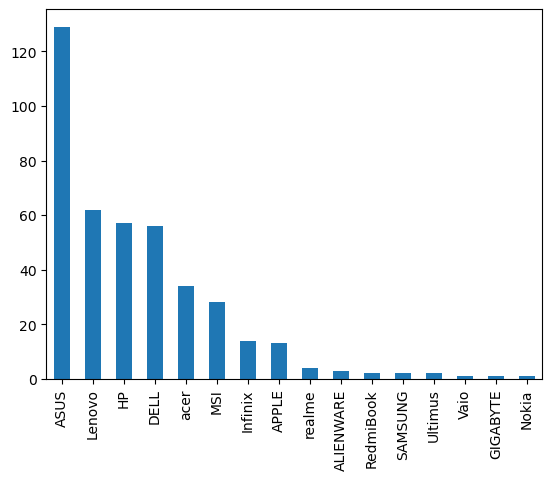

In [28]:
df["Brand"].value_counts().plot(kind="bar")

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MRP', ylabel='Density'>

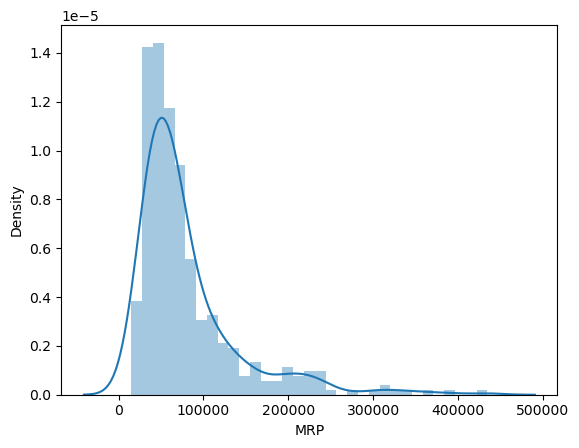

In [29]:
sns.distplot(df["MRP"])

In [30]:
df['Display'] = df['Display'].apply(lambda x: re.sub(r'^\d+\.\d+ cm \(', '', x)).apply(lambda x: re.sub(r' inch\)$', '', x)) 

In [31]:
df

,MRP,Ram_Size,Ram_Type,Processor,Storage,OS,Display,Brand
0,36990.0,8,DDR4,Intel Core i3 Processor,256 GB SSD,Windows 11,14 inch,Lenovo
1,39990.0,8,DDR4,Intel Core i3 Processor,512 GB SSD,Windows 11,15.6 inch,Lenovo
2,32990.0,8,DDR4,Intel Core i3 Processor,512 GB SSD,Windows 11,15.6 inch,ASUS
3,49990.0,8,DDR4,AMD Ryzen 5 Hexa Core Processor,512 GB SSD,Windows 10,15.6 inch,HP
4,49990.0,8,DDR4,Intel Core i5 Processor,512 GB SSD,Windows 11,15.6 inch,ASUS
...,...,...,...,...,...,...,...,...
713,76590.0,16,DDR5,Intel Core i5 Processor,512 GB SSD,Windows 11,13.3,DELL
714,90000.0,16,DDR4,AMD Ryzen 7 Octa Core Processor,512 GB SSD,Windows 10,15.6 inch,HP
715,23490.0,4,LPDDR4,Intel Celeron Dual Core Processor,64 GB EMMC,Chrome,11.6 inch,ASUS
718,125990.0,16,LPDDR5,Intel Core i7 Processor,512 GB SSD,Windows 11,14 inch,ASUS


In [32]:
df['Display'] = df['Display'].str.replace('inch 2','')

In [33]:
df['Display'] = df['Display'].str.replace('inch', '')

In [34]:
df['Display'] = df['Display'].str.replace('cm', '') 

In [35]:
df['Display'] = df['Display'].astype('float')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 719
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MRP        409 non-null    float64
 1   Ram_Size   409 non-null    int32  
 2   Ram_Type   409 non-null    object 
 3   Processor  409 non-null    object 
 4   Storage    409 non-null    object 
 5   OS         409 non-null    object 
 6   Display    409 non-null    float64
 7   Brand      409 non-null    object 
dtypes: float64(2), int32(1), object(5)
memory usage: 27.2+ KB


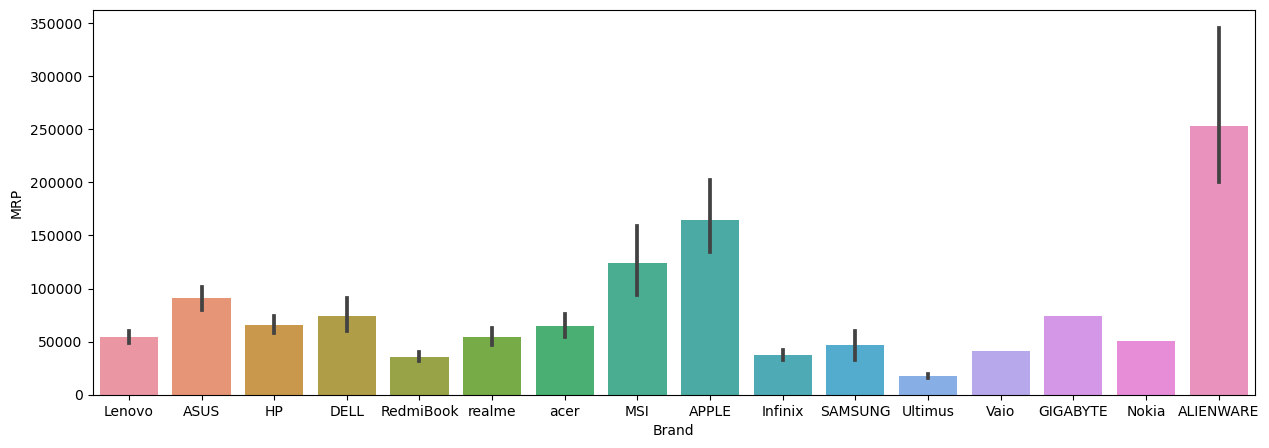

In [37]:
plt.figure(figsize=[15,5])
sns.barplot(x=df["Brand"],y=df["MRP"])
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

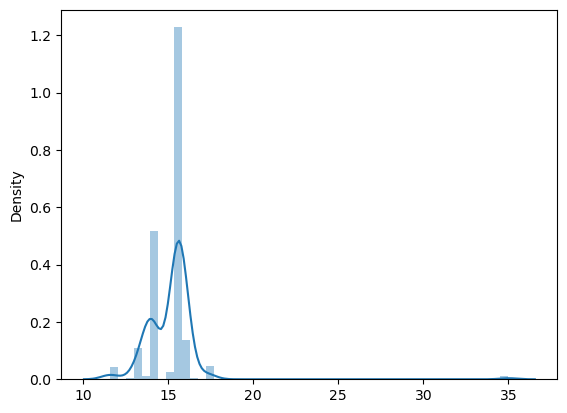

In [38]:
sns.distplot(x=df["Display"])

In [39]:
df.corr()['MRP']

MRP         1.000000
Ram_Size    0.497122
Display     0.128158
Name: MRP, dtype: float64

In [40]:
df['Storage'].value_counts()

512 GB SSD     215
1 TB SSD        69
256 GB SSD      62
1 TB HDD        43
64 GB EMMC       6
2 TB SSD         6
128 GB SSD       4
128 GB EMMC      2
256 GB HDD       1
32 GB EMMC       1
Name: Storage, dtype: int64

In [41]:
df['Storage'] = df['Storage'].astype(str).replace('\.0', '', regex=True)
df["Storage"] = df["Storage"].str.replace('GB', '')
df["Storage"] = df["Storage"].str.replace('TB', '000')
new = df["Storage"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1EMMC"] = df["first"].apply(lambda x: 1 if "EMMC" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"])
df["EMMC"]=(df["first"]*df["Layer1EMMC"])

df.drop(columns=['first','Layer1HDD', 'Layer1SSD', 'Layer1EMMC'],inplace=True) 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6872\855820707.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')


In [42]:
df.head()

,MRP,Ram_Size,Ram_Type,Processor,Storage,OS,Display,Brand,HDD,SSD,EMMC
0,36990.0,8,DDR4,Intel Core i3 Processor,256 SSD,Windows 11,14.0,Lenovo,0,256,0
1,39990.0,8,DDR4,Intel Core i3 Processor,512 SSD,Windows 11,15.6,Lenovo,0,512,0
2,32990.0,8,DDR4,Intel Core i3 Processor,512 SSD,Windows 11,15.6,ASUS,0,512,0
3,49990.0,8,DDR4,AMD Ryzen 5 Hexa Core Processor,512 SSD,Windows 10,15.6,HP,0,512,0
4,49990.0,8,DDR4,Intel Core i5 Processor,512 SSD,Windows 11,15.6,ASUS,0,512,0


In [43]:
df.drop(columns=['Storage'],inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 719
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MRP        409 non-null    float64
 1   Ram_Size   409 non-null    int32  
 2   Ram_Type   409 non-null    object 
 3   Processor  409 non-null    object 
 4   OS         409 non-null    object 
 5   Display    409 non-null    float64
 6   Brand      409 non-null    object 
 7   HDD        409 non-null    int64  
 8   SSD        409 non-null    int64  
 9   EMMC       409 non-null    int64  
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 33.6+ KB


In [45]:
df["Processor"].value_counts()

Intel Core i5 Processor                   108
Intel Core i3 Processor                    69
Intel Core i7 Processor                    51
AMD Ryzen 5 Hexa Core Processor            41
AMD Ryzen 7 Octa Core Processor            37
Intel Celeron Dual Core Processor          18
AMD Ryzen 3 Dual Core Processor            17
AMD Ryzen 9 Octa Core Processor            15
Intel Core i9 Processor                    11
AMD Ryzen 5 Quad Core Processor             8
Apple M1 Processor                          5
Apple M1 Pro Processor                      4
Apple M2 Processor                          3
Intel Pentium Silver Processor              3
AMD Ryzen 3 Quad Core Processor             3
Intel Celeron Quad Core Processor           2
AMD Athlon Dual Core Processor              2
Intel OptaneIntel Core i3 Processor         2
AMD Ryzen 5 Dual Core Processor             2
Intel Pentium Quad Core Processor           2
Intel Evo Core i5 Processor                 1
Qualcomm Snapdragon 7c Gen 2 Proce

In [46]:
def fetch_processor(text):
    if text == 'Intel Core i7 Processor' or text == 'Intel Core i5 Processor' or text == 'Intel Core i3 Processor':
      return text
    elif text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    elif text.split()[0] == 'Apple':
      return 'Apple Processor'
    elif text.split()[0] == 'Qualcomm':
      return 'Qualcomm processor'
    else:
      return 'AMD Processor' 

In [47]:
df['CPU_brand'] = df['Processor'].apply(fetch_processor)

<AxesSubplot:>

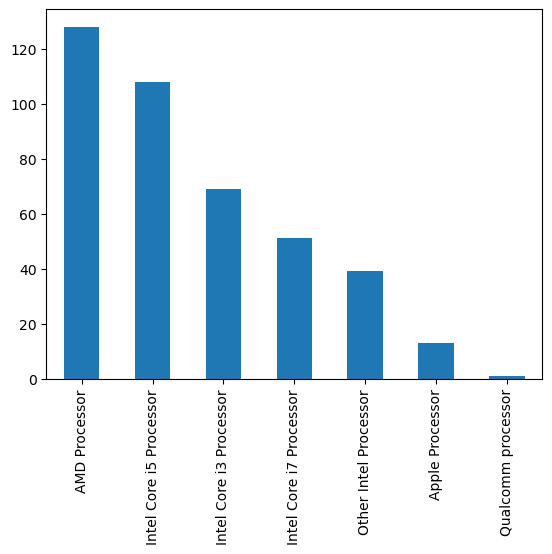

In [48]:
df['CPU_brand'].value_counts().plot(kind='bar')

In [49]:
df.head()

,MRP,Ram_Size,Ram_Type,Processor,OS,Display,Brand,HDD,SSD,EMMC,CPU_brand
0,36990.0,8,DDR4,Intel Core i3 Processor,Windows 11,14.0,Lenovo,0,256,0,Intel Core i3 Processor
1,39990.0,8,DDR4,Intel Core i3 Processor,Windows 11,15.6,Lenovo,0,512,0,Intel Core i3 Processor
2,32990.0,8,DDR4,Intel Core i3 Processor,Windows 11,15.6,ASUS,0,512,0,Intel Core i3 Processor
3,49990.0,8,DDR4,AMD Ryzen 5 Hexa Core Processor,Windows 10,15.6,HP,0,512,0,AMD Processor
4,49990.0,8,DDR4,Intel Core i5 Processor,Windows 11,15.6,ASUS,0,512,0,Intel Core i5 Processor


In [50]:
df['OS'].value_counts()

Windows 11    272
Windows 10    114
Mac OS         13
Chrome          6
DOS             4
Name: OS, dtype: int64

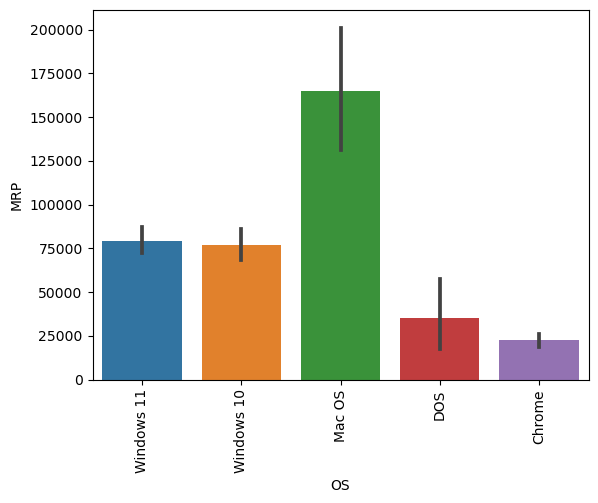

In [51]:
sns.barplot(x=df['OS'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
def cat_os(inp):
    if inp == 'Windows 11' or inp == 'Windows 10':
      return 'Windows'
    elif inp == 'Mac OS':
      return 'Mac'
    elif inp == 'DOS':
      return 'DOS'
    else:
      return 'Chrome'

In [53]:
df['OS'] = df['OS'].apply(cat_os)

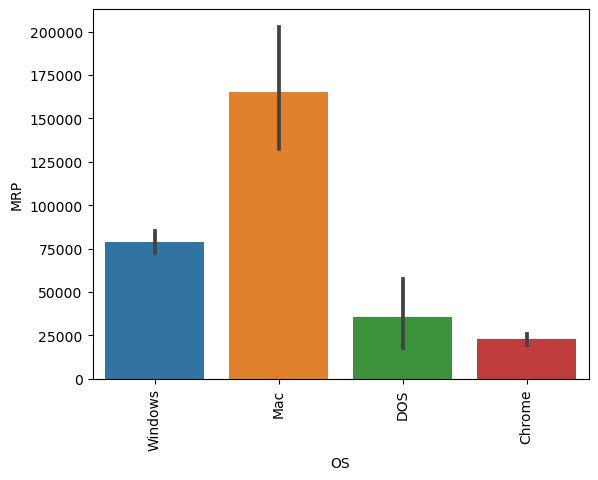

In [54]:
sns.barplot(x=df['OS'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

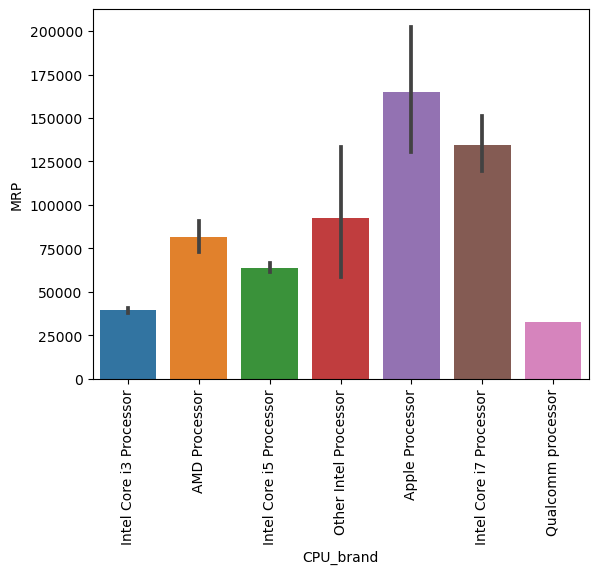

In [55]:
sns.barplot(x=df['CPU_brand'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
df.drop(columns=['Processor'],inplace=True)

In [57]:
df.head()

,MRP,Ram_Size,Ram_Type,OS,Display,Brand,HDD,SSD,EMMC,CPU_brand
0,36990.0,8,DDR4,Windows,14.0,Lenovo,0,256,0,Intel Core i3 Processor
1,39990.0,8,DDR4,Windows,15.6,Lenovo,0,512,0,Intel Core i3 Processor
2,32990.0,8,DDR4,Windows,15.6,ASUS,0,512,0,Intel Core i3 Processor
3,49990.0,8,DDR4,Windows,15.6,HP,0,512,0,AMD Processor
4,49990.0,8,DDR4,Windows,15.6,ASUS,0,512,0,Intel Core i5 Processor


In [58]:
df.corr()['MRP']

MRP         1.000000
Ram_Size    0.497122
Display     0.128158
HDD        -0.114978
SSD         0.727529
EMMC       -0.122681
Name: MRP, dtype: float64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 719
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MRP        409 non-null    float64
 1   Ram_Size   409 non-null    int32  
 2   Ram_Type   409 non-null    object 
 3   OS         409 non-null    object 
 4   Display    409 non-null    float64
 5   Brand      409 non-null    object 
 6   HDD        409 non-null    int64  
 7   SSD        409 non-null    int64  
 8   EMMC       409 non-null    int64  
 9   CPU_brand  409 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 33.6+ KB


<AxesSubplot:>

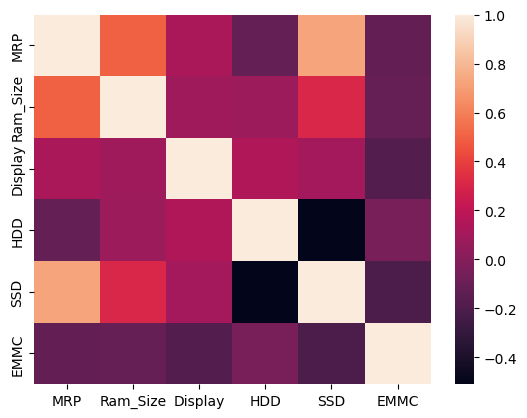

In [60]:
sns.heatmap(df.corr())

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MRP', ylabel='Density'>

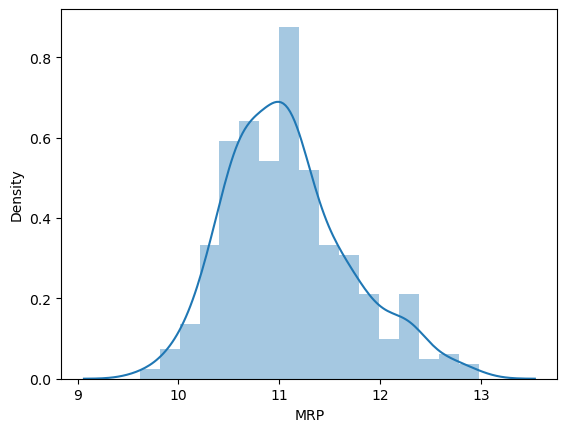

In [61]:
sns.distplot(np.log(df['MRP']))

In [62]:
df['Ram_Type'].value_counts()

DDR4              314
DDR5               39
LPDDR4X            30
LPDDR4              8
Unified Memory      8
LPDDR5              8
DDR4,               1
LPDDR3              1
Name: Ram_Type, dtype: int64

# Model Building


In [63]:
df.head()

,MRP,Ram_Size,Ram_Type,OS,Display,Brand,HDD,SSD,EMMC,CPU_brand
0,36990.0,8,DDR4,Windows,14.0,Lenovo,0,256,0,Intel Core i3 Processor
1,39990.0,8,DDR4,Windows,15.6,Lenovo,0,512,0,Intel Core i3 Processor
2,32990.0,8,DDR4,Windows,15.6,ASUS,0,512,0,Intel Core i3 Processor
3,49990.0,8,DDR4,Windows,15.6,HP,0,512,0,AMD Processor
4,49990.0,8,DDR4,Windows,15.6,ASUS,0,512,0,Intel Core i5 Processor


In [64]:
X = df.drop(columns=['MRP'])
y = np.log(df['MRP'])

In [65]:
X

,Ram_Size,Ram_Type,OS,Display,Brand,HDD,SSD,EMMC,CPU_brand
0,8,DDR4,Windows,14.0,Lenovo,0,256,0,Intel Core i3 Processor
1,8,DDR4,Windows,15.6,Lenovo,0,512,0,Intel Core i3 Processor
2,8,DDR4,Windows,15.6,ASUS,0,512,0,Intel Core i3 Processor
3,8,DDR4,Windows,15.6,HP,0,512,0,AMD Processor
4,8,DDR4,Windows,15.6,ASUS,0,512,0,Intel Core i5 Processor
...,...,...,...,...,...,...,...,...,...
713,16,DDR5,Windows,13.3,DELL,0,512,0,Intel Core i5 Processor
714,16,DDR4,Windows,15.6,HP,0,512,0,AMD Processor
715,4,LPDDR4,Chrome,11.6,ASUS,0,0,64,Other Intel Processor
718,16,LPDDR5,Windows,14.0,ASUS,0,512,0,Intel Core i7 Processor


In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ram_Size   409 non-null    int32  
 1   Ram_Type   409 non-null    object 
 2   OS         409 non-null    object 
 3   Display    409 non-null    float64
 4   Brand      409 non-null    object 
 5   HDD        409 non-null    int64  
 6   SSD        409 non-null    int64  
 7   EMMC       409 non-null    int64  
 8   CPU_brand  409 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 30.4+ KB


In [67]:
y

0      10.518403
1      10.596385
2      10.403960
3      10.819578
4      10.819578
         ...    
713    11.246222
714    11.407565
715    10.064330
718    11.743958
719    10.839385
Name: MRP, Length: 409, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Linear Regression


In [71]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore'),[1,2,4,8])],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.8004850311358893
MAE 0.18391772664979764


# KNN


In [72]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore'),[1,2,4,8])],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe1 = Pipeline([('step1',step1),('step2',step2)])

pipe1.fit(X_train,y_train)

y_pred = pipe1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



R2 score 0.4740332348274987
MAE 0.22666593723795941


# Desicion Tree

In [73]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore'),[1,2,4,8])],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe2 = Pipeline([('step1',step1),('step2',step2)])

pipe2.fit(X_train,y_train)

y_pred = pipe2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8242615433089632
MAE 0.16731971223790748


# Random Forest


In [74]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore'),[1,2,4,8])],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe3 = Pipeline([('step1',step1),('step2',step2)])

pipe3.fit(X_train,y_train)

y_pred = pipe3.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8031690783732599
MAE 0.16207786770416654


# SVM

In [75]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore'),[1,2,4,8])],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)
pipe4 = Pipeline([('step1',step1),('step2',step2)])

pipe4.fit(X_train,y_train)

y_pred = pipe4.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7976600704357174
MAE 0.17833183658732424


# Extra Trees

In [76]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore'),[1,2,4,8])],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
pipe5 = Pipeline([('step1',step1),('step2',step2)])

pipe5.fit(X_train,y_train)

y_pred = pipe5.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8130920758958922
MAE 0.16415817262278296


# Decision tree model is giving the best accuracy


*   R2 Score : 0.8242615433089632
*   MAE: 0.16731971223790748



In [77]:
import pickle

In [78]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe2,open('pipe.pkl','wb')) 